In [1]:
%matplotlib inline
import sys
print('Python Version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np
print('numpy version: {}'.format(np.__version__))

import scipy as sp
print('scipy version: {}'.format(sp.__version__))

import IPython
print('ipython version: {}'.format(IPython.__version__))

import sklearn
print('scikit-learn version: {}'.format(sklearn.__version__))

import matplotlib.pyplot as plt

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rcParams["font.family"] = 'AppleGothic'

import mglearn

Python Version: 3.5.3 |Anaconda custom (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.20.3
matplotlib version: 2.0.2
numpy version: 1.13.1
scipy version: 0.19.1
ipython version: 6.0.0
scikit-learn version: 0.18.2


w[0]: 0.393906  b: -0.031804


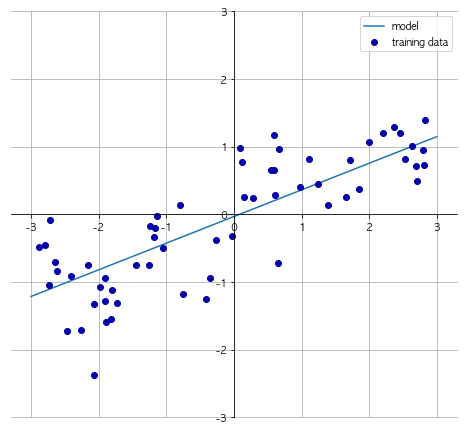

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [4]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


In [5]:
print('훈련 세트 점수: {:.3f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.670
테스트 세트 점수: 0.659


In [6]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [7]:
print('훈련 세트 점수: {:.3f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.952
테스트 세트 점수: 0.606


In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print('훈련 세트 점수: {:.3f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.886
테스트 세트 점수: 0.753


In [9]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('훈련 세트 점수: {:.3f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.788
테스트 세트 점수: 0.636


In [10]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('훈련 세트 점수: {:.3f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.929
테스트 세트 점수: 0.772


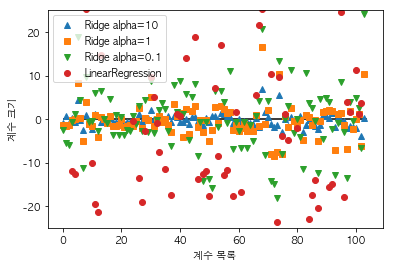

In [13]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

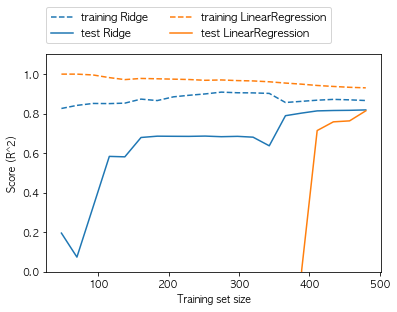

In [15]:
mglearn.plots.plot_ridge_n_samples()

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print('훈련 세트 점수: {:.3f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(lasso.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.293
테스트 세트 점수: 0.209
사용한 특성의 수: 4


In [18]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print('훈련 세트 점수: {:.3f}'.format(lasso001.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(lasso001.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.897
테스트 세트 점수: 0.766
사용한 특성의 수: 33


In [21]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print('훈련 세트 점수: {:.3f}'.format(lasso00001.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(lasso00001.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.951
테스트 세트 점수: 0.640
사용한 특성의 수: 94


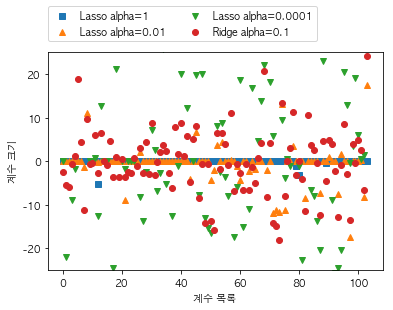

In [22]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

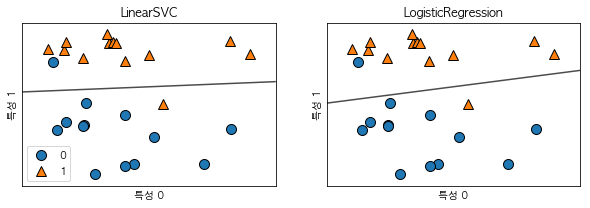

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

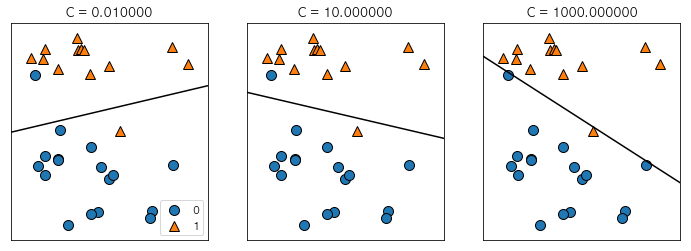

In [24]:
mglearn.plots.plot_linear_svc_regularization()

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

print('훈련 세트 점수: {:.3f}'.format(logreg.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


In [26]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print('훈련 세트 점수: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.979
테스트 세트 점수: 0.965


In [27]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print('훈련 세트 점수: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


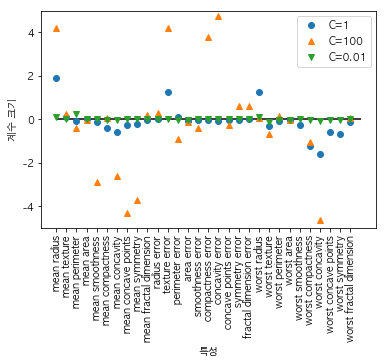

In [28]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend()

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.913
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.923
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.960
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.958
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.986
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.979


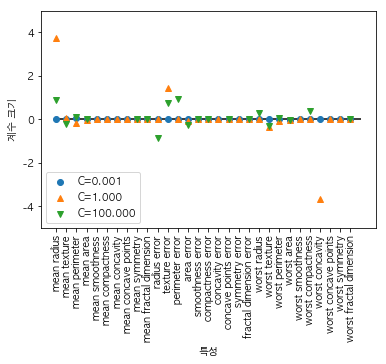

In [29]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print('C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.3f}'.format(
        C, lr_l1.score(X_train, y_train)
    ))
    print('C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.3f}'.format(
        C, lr_l1.score(X_test, y_test)
    ))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('특성')
plt.ylabel('계수 크기')

plt.ylim(-5, 5)
plt.legend(loc=3)

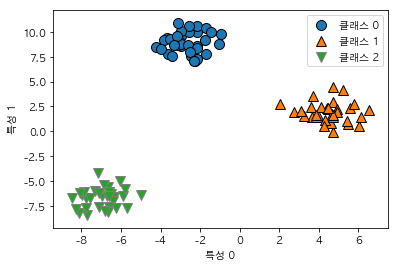

In [30]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2'])

In [31]:
linear_svm = LinearSVC().fit(X, y)
print('계수 배열의 크기: ', linear_svm.coef_.shape)
print('절편 배열의 크기: ', linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


In [32]:
X.shape

(100, 2)

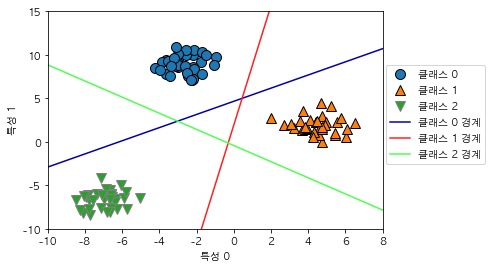

In [33]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

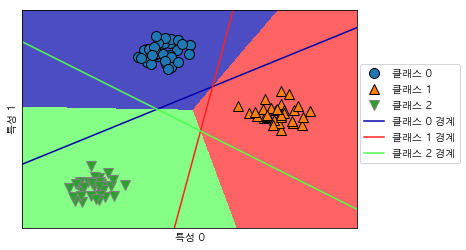

In [35]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15 ,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel('특성 0')
plt.ylabel('특성 1')